# CrimeCast: Forecasting Crime Categories

![CrimeCast Banner](https://drive.google.com/uc?export=view&id=1eskrvAYu6lUvH6Uhyp_l1v54ykTJFDD9)
<h3 style="color:red;">About</h3>
<p>This notebook focuses on crime forecasting using a comprehensive dataset that captures various aspects of criminal activities, including date, time, location, victim details, and more.</p>
<br>
<h3 style="color:red;">Goal</h3>
<p>Our goal is to leverage machine learning techniques to analyze the dataset and predict crime categories effectively.</p>

## Data Loading

In [143]:
import numpy as np; import pandas as pd; pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt; import seaborn as sns

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

## Exploratory Data Analysis

In [144]:
data = train_df
data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


### Columns Information
1. **Location:** Location of the incident.
2. **Cross_Street:** Cross street near the incident.
3. **Latitude:** Latitude coordinate.
4. **Longitude:** Longitude coordinate.
5. **Date_Reported:** Date when the crime was reported.
6. **Date_Occurred:** Date when the crime occurred.
7. **Time_Occurred:** Time when the crime occurred.
8. **Area_ID:** ID of the area where the crime occurred.
9. **Area_Name:** Name of the area where the crime occurred.
10. **Reporting_District_no:** Reporting district number.
11. **Part 1-2:** Part classification of the crime (1 or 2).
12. **Modus_Operandi:** Method of operation used in the crime.
13. **Victim_Age:** Age of the victim.
14. **Victim_Sex:** Sex of the victim.
15. **Victim_Descent:** Descent of the victim.
16. **Premise_Code:** Code representing the type of premise where the crime occurred.
17. **Premise_Description:** Description of the premise.
18. **Weapon_Used_Code:** Code of the weapon used.
19. **Weapon_Description:** Description of the weapon used.
20. **Status:** Status of the investigation.
21. **Status_Description:** Description of the status.
22. **Crime_Category:** Category of the crime (target variable).

In [145]:
data['Victim_Age'].value_counts().head()

Victim_Age
0.0     4828
30.0     448
31.0     446
26.0     442
29.0     425
Name: count, dtype: int64

In [146]:
data.drop(['Area_Name','Premise_Description','Weapon_Description','Status_Description'],axis=1, inplace=True) # Droping columns giving info about IDs
data.isna().mean() * 100

Location                  0.000
Cross_Street             82.760
Latitude                  0.000
Longitude                 0.000
Date_Reported             0.000
Date_Occurred             0.000
Time_Occurred             0.000
Area_ID                   0.000
Reporting_District_no     0.000
Part 1-2                  0.000
Modus_Operandi           13.705
Victim_Age                0.000
Victim_Sex               13.120
Victim_Descent           13.120
Premise_Code              0.000
Weapon_Used_Code         63.325
Status                    0.000
Crime_Category            0.000
dtype: float64

In [147]:
data['Is_Cross_Street'] = data['Cross_Street'].apply(lambda x: 0 if pd.isna(x) else 1)

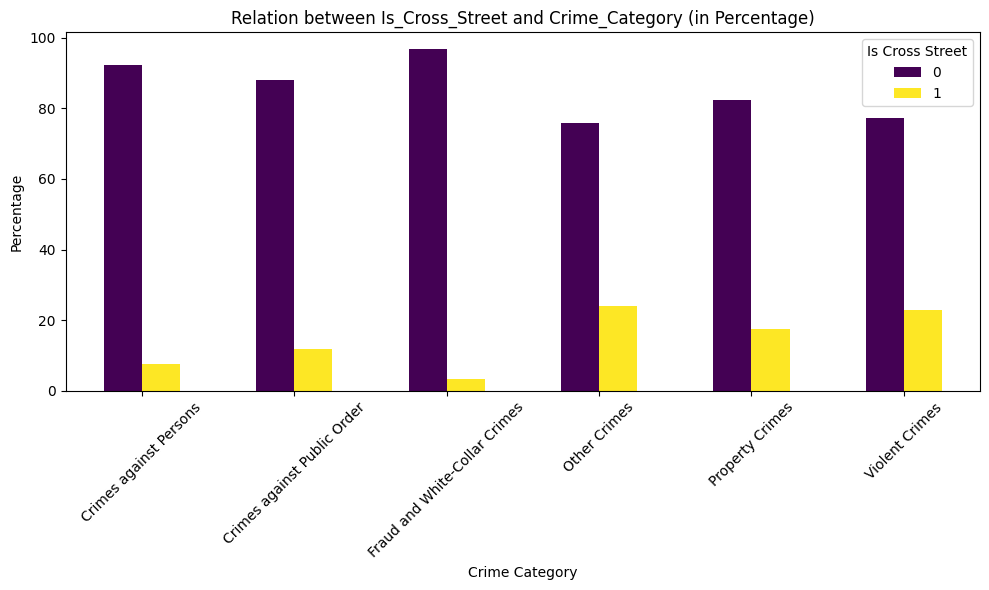

In [148]:
category_counts = data.groupby(['Crime_Category', 'Is_Cross_Street']).size().unstack(fill_value=0)
category_percentage = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
category_percentage.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='viridis')
plt.title('Relation between Is_Cross_Street and Crime_Category (in Percentage)')
plt.xlabel('Crime Category')
plt.ylabel('Percentage')
plt.legend(title='Is Cross Street', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [149]:
data.drop(['Cross_Street','Is_Cross_Street'], axis=1, inplace=True) # Dropping columns with more null values
data['Location']

0         4500    CARPENTER                    AV
1                 45TH                         ST
2          600 E  MARTIN LUTHER KING JR        BL
3        14900    ORO GRANDE                   ST
4         7100 S  VERMONT                      AV
                           ...                   
19995     5100 W  ADAMS                        BL
19996    16900    ROSCOE                       BL
19997     1000 S  SHENANDOAH                   ST
19998      300 W  SEPULVEDA                    ST
19999             DALTON                       AV
Name: Location, Length: 20000, dtype: object

In [150]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class LocationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, location_col='Location'):
        self.location_col = location_col

    def extract_location_data(self, s):
        street_number = direction = street_name = street_type = None
        try:  # street number
            nt = s.split(' ')[0]
            street_number = nt if int(nt.isdigit()) else None
        except: pass
        try:  # direction
            nt = [x.strip() for x in s.split(' ') if x.strip()]
            for x in nt:
                if x.isdigit(): continue
                elif len(x) > 1: break
                if x in ['N', 'S', 'E', 'W']:
                    direction = x
                    break
        except: pass
        try:  # street type
            nt = s.split('   ')[-1].strip()
            street_type = nt if len(nt) == 2 and not(nt.isdigit()) else None
        except: pass
        street_name = None  # street name
        nt = [x.strip() for x in s.split('  ') if x.strip()]
        for x in nt:
            test_x = [x.strip() for x in x.split(' ') if x.strip()]
            if len(test_x) == 1 and not(street_number and street_number == test_x[0]) and not(street_type and street_type == test_x[0]):
                street_name = x
                break
            elif not(street_number and street_number in test_x):
                street_name = x
                break
        
        return street_number, direction, street_name, street_type

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        parsed_data = []
        for idx, row in X.iterrows():
            string = row[self.location_col]
            street_number, direction, street_name, street_type = self.extract_location_data(string)
            parsed_data.append({
                'Street_Number': street_number,
                'Direction': direction,
                'Street_Name': street_name,
                'Street_Type': street_type
            })
        location_df = pd.DataFrame(parsed_data, index=X.index)
        return pd.concat([location_df, X.drop('Location',axis=1)], axis=1)

In [151]:
transformer = LocationTransformer(location_col='Location')
data = transformer.fit_transform(data)
data.head()

,Street_Number,Direction,Street_Name,Street_Type,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category
0,4500,None,CARPENTER,AV,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,1563.0,1.0,0385,75.0,M,W,101.0,NaN,IC,Property Crimes
1,None,None,45TH,ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,400.0,IC,Property Crimes
2,600,E,MARTIN LUTHER KING JR,BL,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,1343.0,2.0,0329 1202,67.0,M,B,501.0,NaN,IC,Property Crimes
3,14900,None,ORO GRANDE,ST,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,1924.0,1.0,0329 1300,61.0,M,H,101.0,NaN,IC,Property Crimes
4,7100,S,VERMONT,AV,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,400.0,IC,Property Crimes


In [152]:
data[['Street_Number','Direction','Street_Name','Street_Type']].isna().mean() * 100

Street_Number    17.240
Direction        64.765
Street_Name       0.000
Street_Type       9.035
dtype: float64

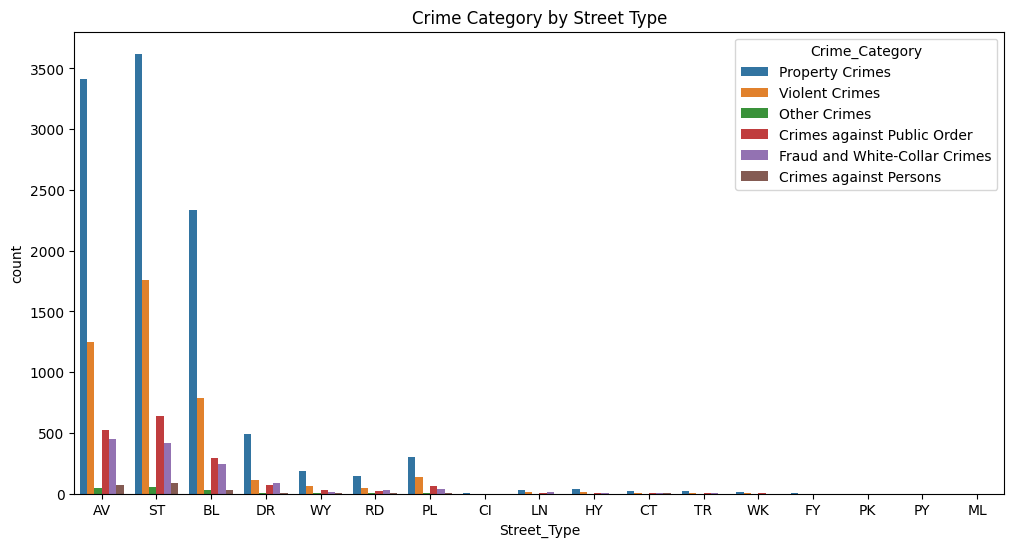

In [153]:
# Count plot for Crime_Category and Street_Type
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Street_Type', hue='Crime_Category')
plt.title('Crime Category by Street Type')
plt.show()

In [154]:
def extract_date_info():
    data['Date_Reported'] = pd.to_datetime(data['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
    data['Date_Occurred'] = pd.to_datetime(data['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')
    def convert_time_occurred(time):
        time_str = f"{int(time):04d}"
        return f"{time_str[:2]}:{time_str[2:]}:00"
    data['Time_Occurred'] = data['Time_Occurred'].apply(convert_time_occurred)

    data['Days_After_Reported'] = (data['Date_Reported'] - data['Date_Occurred']).dt.days

    data['Reported_Day'] = data['Date_Reported'].dt.day
    data['Reported_Month'] = data['Date_Reported'].dt.month
    data['Reported_Weekday'] = data['Date_Reported'].dt.weekday
    data['Occurred_Day'] = data['Date_Occurred'].dt.day
    data['Occurred_Month'] = data['Date_Occurred'].dt.month
    data['Occurred_Weekday'] = data['Date_Occurred'].dt.weekday
    data['Occurred_Weekmonth'] = data['Date_Occurred'].apply(lambda d: (d.day - 1) // 7 + 1)
    data['Occurred_Weekend?'] = np.where(data['Occurred_Weekday'].isin([5, 6]), 1, 0)
    data['Occurred_Hour'] = pd.to_datetime(data['Time_Occurred'], format='%H:%M:%S').dt.hour

In [155]:
extract_date_info()
data.head()

,Street_Number,Direction,Street_Name,Street_Type,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category,Days_After_Reported,Reported_Day,Reported_Month,Reported_Weekday,Occurred_Day,Occurred_Month,Occurred_Weekday,Occurred_Weekmonth,Occurred_Weekend?,Occurred_Hour
0,4500,None,CARPENTER,AV,34.1522,-118.3910,2020-03-09,2020-03-06,18:00:00,15.0,1563.0,1.0,0385,75.0,M,W,101.0,NaN,IC,Property Crimes,3,9,3,0,6,3,4,1,0,18
1,None,None,45TH,ST,34.0028,-118.2391,2020-02-27,2020-02-27,13:45:00,13.0,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,400.0,IC,Property Crimes,0,27,2,3,27,2,3,4,0,13
2,600,E,MARTIN LUTHER KING JR,BL,34.0111,-118.2653,2020-08-21,2020-08-21,06:05:00,13.0,1343.0,2.0,0329 1202,67.0,M,B,501.0,NaN,IC,Property Crimes,0,21,8,4,21,8,4,3,0,6
3,14900,None,ORO GRANDE,ST,34.2953,-118.4590,2020-11-08,2020-11-06,18:00:00,19.0,1924.0,1.0,0329 1300,61.0,M,H,101.0,NaN,IC,Property Crimes,2,8,11,6,6,11,4,1,0,18
4,7100,S,VERMONT,AV,33.9787,-118.2918,2020-02-25,2020-02-25,11:30:00,12.0,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,400.0,IC,Property Crimes,0,25,2,1,25,2,1,4,0,11


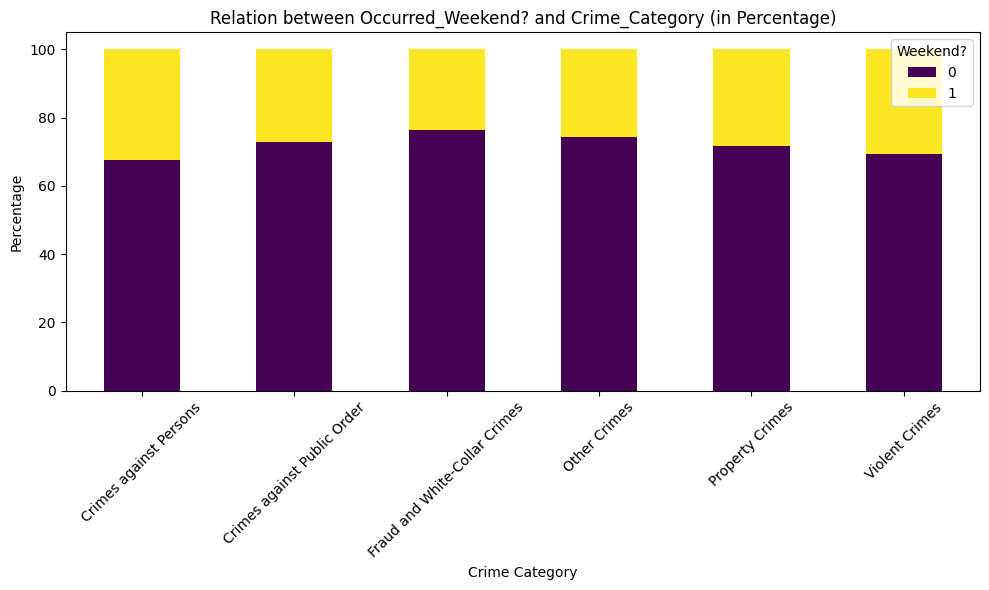

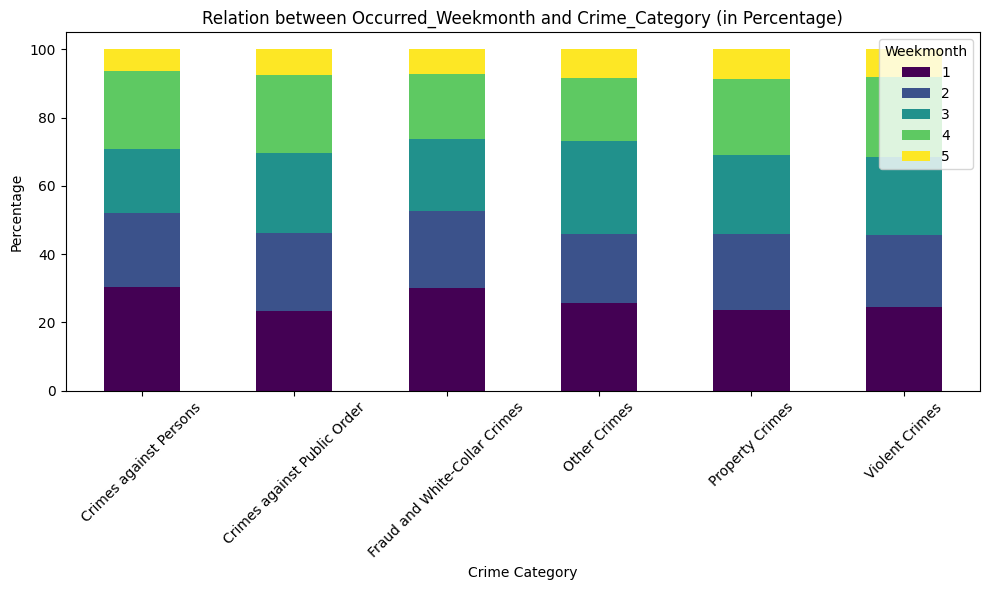

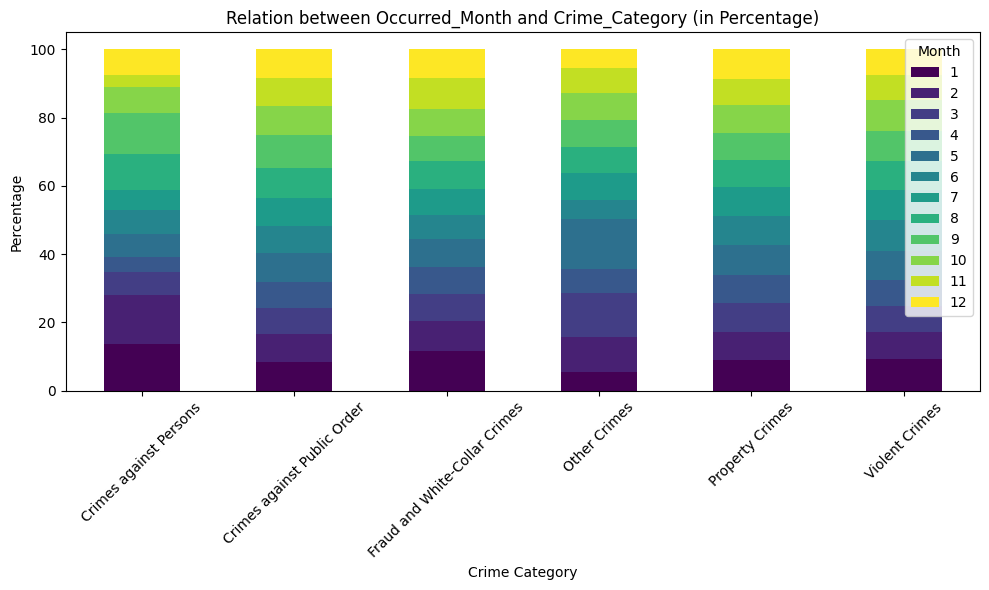

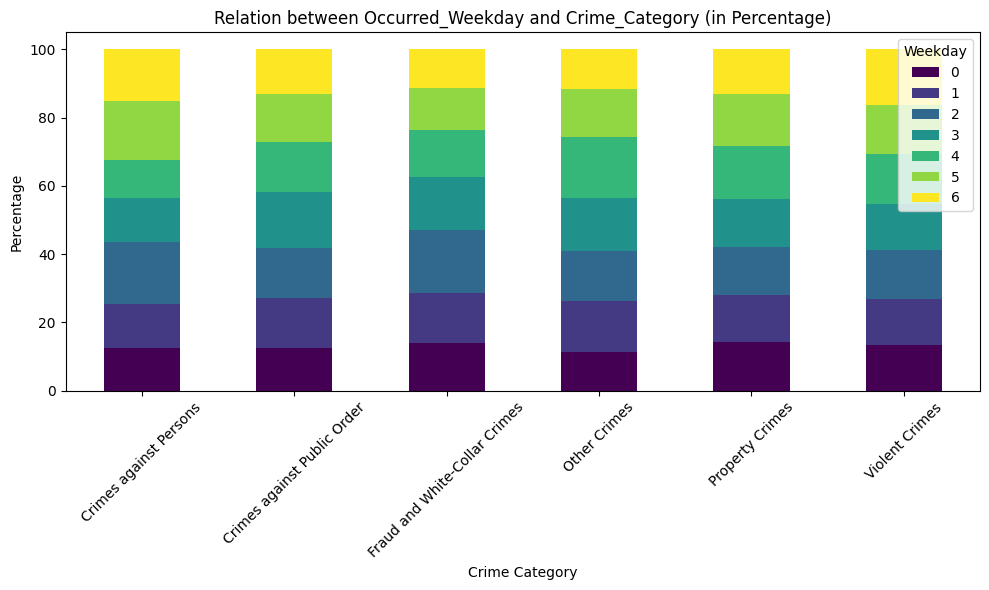

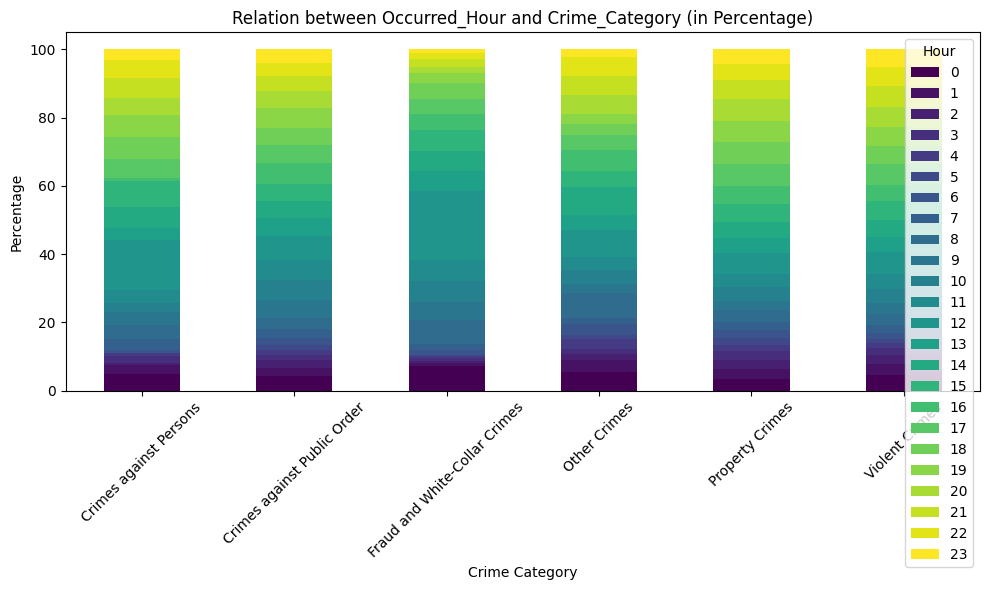

In [156]:
category_counts = data.groupby(['Crime_Category', 'Occurred_Weekend?']).size().unstack(fill_value=0)
category_percentage = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
category_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Relation between Occurred_Weekend? and Crime_Category (in Percentage)')
plt.xlabel('Crime Category')
plt.ylabel('Percentage')
plt.legend(title='Weekend?', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

category_counts = data.groupby(['Crime_Category', 'Occurred_Weekmonth']).size().unstack(fill_value=0)
category_percentage = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
category_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Relation between Occurred_Weekmonth and Crime_Category (in Percentage)')
plt.xlabel('Crime Category')
plt.ylabel('Percentage')
plt.legend(title='Weekmonth', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

category_counts = data.groupby(['Crime_Category', 'Occurred_Month']).size().unstack(fill_value=0)
category_percentage = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
category_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Relation between Occurred_Month and Crime_Category (in Percentage)')
plt.xlabel('Crime Category')
plt.ylabel('Percentage')
plt.legend(title='Month', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

category_counts = data.groupby(['Crime_Category', 'Occurred_Weekday']).size().unstack(fill_value=0)
category_percentage = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
category_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Relation between Occurred_Weekday and Crime_Category (in Percentage)')
plt.xlabel('Crime Category')
plt.ylabel('Percentage')
plt.legend(title='Weekday', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

category_counts = data.groupby(['Crime_Category', 'Occurred_Hour']).size().unstack(fill_value=0)
category_percentage = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
category_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Relation between Occurred_Hour and Crime_Category (in Percentage)')
plt.xlabel('Crime Category')
plt.ylabel('Percentage')
plt.legend(title='Hour', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# add more

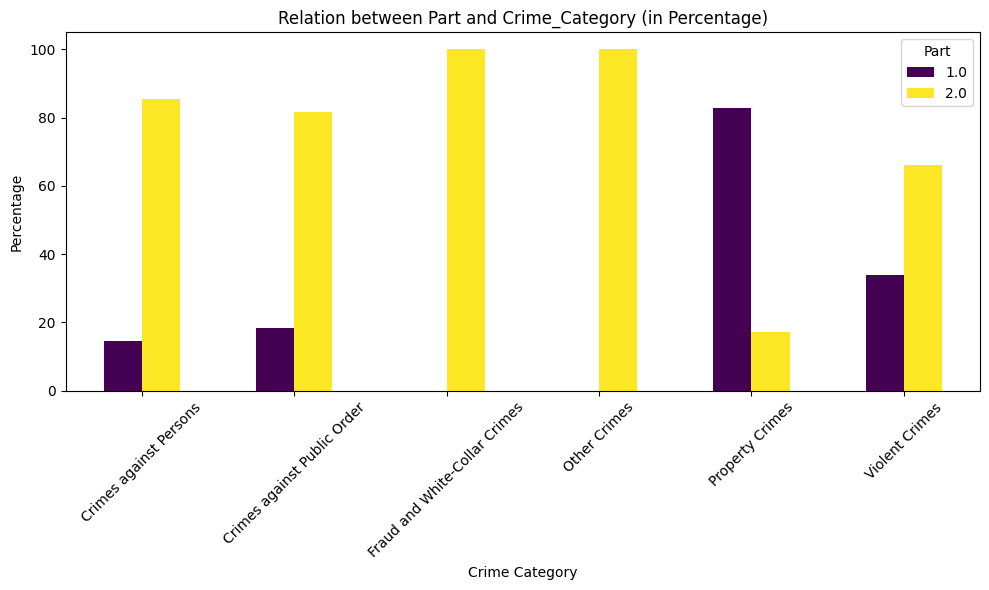

In [157]:
category_counts = data.groupby(['Crime_Category', 'Part 1-2']).size().unstack(fill_value=0)
category_percentage = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
category_percentage.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='viridis')
plt.title('Relation between Part and Crime_Category (in Percentage)')
plt.xlabel('Crime Category')
plt.ylabel('Percentage')
plt.legend(title='Part', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Looks like Part 1-2 is ordinal data

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

data['Modus_Operandi'] = data['Modus_Operandi'].fillna('')

print(data['Modus_Operandi'].shape)

vectorizer.fit_transform(data['Modus_Operandi'])
modus = vectorizer.transform(data['Modus_Operandi'])
feature_names = vectorizer.get_feature_names_out()

print(modus.shape)

modus_data = pd.DataFrame(data=modus.toarray(), columns=feature_names)
data = pd.concat([data.drop('Modus_Operandi',axis=1),modus_data], axis=1)
data.head()

(20000,)
(20000, 481)


,Street_Number,Direction,Street_Name,Street_Type,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category,Days_After_Reported,Reported_Day,Reported_Month,Reported_Weekday,Occurred_Day,Occurred_Month,Occurred_Weekday,Occurred_Weekmonth,Occurred_Weekend?,Occurred_Hour,0100,0104,0105,0110,0112,0113,0114,0115,0117,0120,0121,0200,0201,0202,0206,0207,0209,0210,0211,0212,0213,0216,0217,0220,0301,0302,0303,0304,0305,0307,0308,0309,0310,0311,0312,0314,0315,0316,0319,0321,0322,0323,0324,0325,0326,0327,0328,0329,0330,0332,0334,0335,0336,0337,0338,0339,0340,0341,0342,0343,0344,0345,0346,0347,0349,0350,0351,0352,0353,0354,0355,0356,0357,0358,0359,0360,0361,0362,0363,0364,0365,0366,0368,0369,0370,0371,0372,0373,0374,0375,0377,0378,0379,0380,0381,0382,0383,0384,0385,0386,0387,0388,0389,0390,0391,0392,0394,0395,0396,0397,0398,0399,0400,0401,0402,0404,0405,0406,0407,0408,0409,0410,0411,0413,0414,0416,0417,0418,0419,0420,0421,0422,0424,0425,0426,0429,0430,0431,0432,0433,0434,0437,0440,0442,0443,0444,0445,0446,0447,0448,0449,0450,0451,0500,0501,0503,0505,0507,0508,0509,0510,0512,0513,0514,0515,0516,0519,0520,0522,0525,0526,0527,0528,0529,0531,0532,0533,0534,0536,0537,0538,0541,0542,0543,0544,0545,0547,0549,0550,0551,0552,0553,0554,0555,0556,0557,0558,0559,0561,0562,0601,0602,0603,0604,0605,0701,0800,0850,0851,0853,0855,0856,0857,0858,0859,0902,0903,0906,0907,0908,0910,0911,0912,0913,0914,0915,0916,0917,0919,0922,0923,0924,0925,0926,0927,0928,0929,0930,0931,0933,0935,0938,0940,0942,0944,0945,0946,0947,1000,1006,1008,1009,1012,1013,1017,1018,1019,1020,1021,1022,1026,1028,1100,1202,1203,1204,1205,1206,1210,1211,1212,1213,1214,1215,1216,1218,1219,1221,1222,1223,1224,1225,1227,1229,1230,1232,1233,1234,1236,1237,1238,1239,1240,1241,1242,1243,1245,1248,1251,1252,1253,1254,1256,1257,1258,1259,1260,1261,1262,1265,1266,1267,1268,1270,1271,1273,1274,1275,1276,1277,1278,1279,1281,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1315,1316,1317,1318,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1413,1414,1415,1416,1419,1420,1501,1510,1512,1513,1514,1516,1517,1519,1520,1522,1528,1531,1536,1538,1601,1602,1604,1605,1606,1607,1608,1609,1610,1611,1612,1701,1702,1801,1802,1803,1804,1805,1807,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1900,1901,1902,1903,1906,1908,1910,1912,1913,1914,1915,1916,2000,2001,2002,2003,2004,2005,2006,2007,2009,2011,2013,2014,2018,2019,2020,2021,2022,2023,2024,2025,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2040,2041,2042,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2058,2059,2060,2104,2108,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,4500,None,CARPENTER,AV,34.1522,-118.3910,2020-03-09,2020-03-06,18:00:00,15.0,1563.0,1.0,75.0,M,W,101.0,NaN,IC,Property Crimes,3,9,3,0,6,3,4,1,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.

In [159]:
data['Street_Number'].value_counts()

Street_Number
600      477
700      414
100      405
800      405
300      380
        ... 
24400      1
00000      1
01200      1
23500      1
05900      1
Name: count, Length: 267, dtype: int64

In [160]:
street_freq = data['Street_Number'].value_counts().to_dict()
data['Street_Number_Encoded'] = data['Street_Number'].map(street_freq)
data['Street_Number_Encoded'].value_counts()

Street_Number_Encoded
405.0    810
477.0    477
414.0    414
97.0     388
380.0    380
        ... 
2.0       14
6.0       12
3.0       12
4.0       12
11.0      11
Name: count, Length: 115, dtype: int64

In [161]:
data['Street_Name'].value_counts()

Street_Name
FIGUEROA      274
SEPULVEDA     226
VERMONT       223
VENTURA       205
WILSHIRE      192
             ... 
DUCOMMUN        1
HOLLY MONT      1
MEDINA          1
MARIANO         1
COLINA          1
Name: count, Length: 2843, dtype: int64

In [162]:
street_freq = data['Street_Name'].value_counts().to_dict()
data['Street_Name_Encoded'] = data['Street_Name'].map(street_freq)
data['Street_Name_Encoded'].value_counts()

Street_Name_Encoded
1     1120
2      972
3      744
4      744
5      565
      ... 
44      44
43      43
42      42
41      41
36      36
Name: count, Length: 99, dtype: int64

In [163]:
data['Street_Type'].value_counts()

Street_Type
ST    6581
AV    5748
BL    3724
DR     776
PL     563
WY     307
RD     247
LN      69
HY      65
CT      41
TR      37
WK      21
CI       8
FY       3
PK       1
PY       1
ML       1
Name: count, dtype: int64

In [164]:
street_freq = data['Street_Type'].value_counts().to_dict()
data['Street_Type_Encoded'] = data['Street_Type'].map(street_freq)
data['Street_Type_Encoded'].value_counts()

Street_Type_Encoded
6581.0    6581
5748.0    5748
3724.0    3724
776.0      776
563.0      563
307.0      307
247.0      247
69.0        69
65.0        65
41.0        41
37.0        37
21.0        21
8.0          8
3.0          3
1.0          3
Name: count, dtype: int64

In [165]:
print(data['Reporting_District_no'].nunique())
street_freq = data['Reporting_District_no'].value_counts().to_dict()
data['Reporting_District_no_Encoded'] = data['Reporting_District_no'].map(street_freq)
data['Reporting_District_no_Encoded'].value_counts()

1120


Reporting_District_no_Encoded
23    828
18    828
16    752
21    714
20    680
     ... 
56     56
55     55
52     52
40     40
1      29
Name: count, Length: 67, dtype: int64

In [166]:
print(data['Premise_Code'].nunique())
street_freq = data['Premise_Code'].value_counts().to_dict()
data['Premise_Code_Encoded'] = data['Premise_Code'].map(street_freq)
data['Premise_Code_Encoded'].value_counts()

217


Premise_Code_Encoded
5033    5033
3379    3379
2491    2491
1437    1437
978      978
        ... 
23        23
11        22
17        17
14        14
7          7
Name: count, Length: 66, dtype: int64

## Preprocessing

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [168]:
class LocationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, location_col='Location'):
        self.location_col = location_col

    def extract_location_data(self, s):
        street_number = direction = street_name = street_type = None
        try:  # street number
            nt = s.split(' ')[0]
            street_number = nt if int(nt.isdigit()) else None
        except: pass
        try:  # direction
            nt = [x.strip() for x in s.split(' ') if x.strip()]
            for x in nt:
                if x.isdigit(): continue
                elif len(x) > 1: break
                if x in ['N', 'S', 'E', 'W']:
                    direction = x
                    break
        except: pass
        try:  # street type
            nt = s.split('   ')[-1].strip()
            street_type = nt if len(nt) == 2 and not(nt.isdigit()) else None
        except: pass
        street_name = None  # street name
        nt = [x.strip() for x in s.split('  ') if x.strip()]
        for x in nt:
            test_x = [x.strip() for x in x.split(' ') if x.strip()]
            if len(test_x) == 1 and not(street_number and street_number == test_x[0]) and not(street_type and street_type == test_x[0]):
                street_name = x
                break
            elif not(street_number and street_number in test_x):
                street_name = x
                break
        
        return street_number, direction, street_name, street_type

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        parsed_data = []
        for idx, row in X.iterrows():
            string = row[self.location_col]
            street_number, direction, street_name, street_type = self.extract_location_data(string)
            parsed_data.append({
                'Street_Number': street_number,
                'Direction': direction,
                'Street_Name': street_name,
                'Street_Type': street_type
            })
        location_df = pd.DataFrame(parsed_data, index=X.index)
        return pd.concat([location_df, X.drop('Location',axis=1)], axis=1)
    
class ExtractDateInfo(BaseEstimator, TransformerMixin):
    def __init__(self, date_reported_col='Date_Reported', date_occurred_col='Date_Occurred', time_occurred_col='Time_Occurred'):
        self.date_reported_col = date_reported_col
        self.date_occurred_col = date_occurred_col
        self.time_occurred_col = time_occurred_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X[self.date_reported_col] = pd.to_datetime(X[self.date_reported_col], format='%m/%d/%Y %I:%M:%S %p')
        X[self.date_occurred_col] = pd.to_datetime(X[self.date_occurred_col], format='%m/%d/%Y %I:%M:%S %p')

        def convert_time_occurred(time):
            time_str = f"{int(time):04d}"
            return f"{time_str[:2]}:{time_str[2:]}:00"

        X[self.time_occurred_col] = X[self.time_occurred_col].apply(convert_time_occurred)
        X['Days_After_Reported'] = (X[self.date_reported_col] - X[self.date_occurred_col]).dt.days
        X['Reported_Day'] = X[self.date_reported_col].dt.day
        X['Reported_Month'] = X[self.date_reported_col].dt.month
        X['Reported_Weekday'] = X[self.date_reported_col].dt.weekday
        X['Occurred_Day'] = X[self.date_occurred_col].dt.day
        X['Occurred_Month'] = X[self.date_occurred_col].dt.month
        X['Occurred_Weekday'] = X[self.date_occurred_col].dt.weekday
        X['Occurred_Weekmonth'] = X[self.date_occurred_col].apply(lambda d: (d.day - 1) // 7 + 1)
        X['Occurred_Weekend?'] = np.where(X['Occurred_Weekday'].isin([5, 6]), 1, 0)
        X['Occurred_Hour'] = pd.to_datetime(X[self.time_occurred_col], format='%H:%M:%S').dt.hour

        return X
    
class TfidfVectorizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
        self.vectorizer = TfidfVectorizer()

    def fit(self, X, y=None):
        X = X.copy()
        X[self.column] = X[self.column].fillna('')
        self.vectorizer.fit(X[self.column])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.column] = X[self.column].fillna('')
        modus = self.vectorizer.transform(X[self.column])
        modus_data = pd.DataFrame(data=modus.toarray(), columns=self.vectorizer.get_feature_names_out(), index=X.index)
        X = X.drop(self.column, axis=1)
        X = pd.concat([X, modus_data], axis=1)
        return X
    
class FlattenAndCountVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.vectorizer = CountVectorizer()
    def fit(self, X, y=None):
        # Ensure X is a 1D array of strings
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0].values.flatten()
        else:
            X = X.flatten()
        self.vectorizer.fit(X)
        return self
    def transform(self, X):
        # Ensure X is a 1D array of strings
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0].values.flatten()
        else:
            X = X.flatten()
        X_vec = self.vectorizer.transform(X)
        return pd.DataFrame(X_vec.toarray(), columns=self.vectorizer.get_feature_names_out())

data.head()

,Street_Number,Direction,Street_Name,Street_Type,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category,Days_After_Reported,Reported_Day,Reported_Month,Reported_Weekday,Occurred_Day,Occurred_Month,Occurred_Weekday,Occurred_Weekmonth,Occurred_Weekend?,Occurred_Hour,0100,0104,0105,0110,0112,0113,0114,0115,0117,0120,0121,0200,0201,0202,0206,0207,0209,0210,0211,0212,0213,0216,0217,0220,0301,0302,0303,0304,0305,0307,0308,0309,0310,0311,0312,0314,0315,0316,0319,0321,0322,0323,0324,0325,0326,0327,0328,0329,0330,0332,0334,0335,0336,0337,0338,0339,0340,0341,0342,0343,0344,0345,0346,0347,0349,0350,0351,0352,0353,0354,0355,0356,0357,0358,0359,0360,0361,0362,0363,0364,0365,0366,0368,0369,0370,0371,0372,0373,0374,0375,0377,0378,0379,0380,0381,0382,0383,0384,0385,0386,0387,0388,0389,0390,0391,0392,0394,0395,0396,0397,0398,0399,0400,0401,0402,0404,0405,0406,0407,0408,0409,0410,0411,0413,0414,0416,0417,0418,0419,0420,0421,0422,0424,0425,0426,0429,0430,0431,0432,0433,0434,0437,0440,0442,0443,0444,0445,0446,0447,0448,0449,0450,0451,0500,0501,0503,0505,0507,0508,0509,0510,0512,0513,0514,0515,0516,0519,0520,0522,0525,0526,0527,0528,0529,0531,0532,0533,0534,0536,0537,0538,0541,0542,0543,0544,0545,0547,0549,0550,0551,0552,0553,0554,0555,0556,0557,0558,0559,0561,0562,0601,0602,0603,0604,0605,0701,0800,0850,0851,0853,0855,0856,0857,0858,0859,0902,0903,0906,0907,0908,0910,0911,0912,0913,0914,0915,0916,0917,0919,0922,0923,0924,0925,0926,0927,0928,0929,0930,0931,0933,0935,0938,0940,0942,0944,0945,0946,0947,1000,1006,1008,1009,1012,1013,1017,1018,1019,1020,1021,1022,1026,1028,1100,1202,1203,1204,1205,1206,1210,1211,1212,1213,1214,1215,1216,1218,1219,1221,1222,1223,1224,1225,1227,1229,1230,1232,1233,1234,1236,1237,1238,1239,1240,1241,1242,1243,1245,1248,1251,1252,1253,1254,1256,1257,1258,1259,1260,1261,1262,1265,1266,1267,1268,1270,1271,1273,1274,1275,1276,1277,1278,1279,1281,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1315,1316,1317,1318,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1413,1414,1415,1416,1419,1420,1501,1510,1512,1513,1514,1516,1517,1519,1520,1522,1528,1531,1536,1538,1601,1602,1604,1605,1606,1607,1608,1609,1610,1611,1612,1701,1702,1801,1802,1803,1804,1805,1807,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1900,1901,1902,1903,1906,1908,1910,1912,1913,1914,1915,1916,2000,2001,2002,2003,2004,2005,2006,2007,2009,2011,2013,2014,2018,2019,2020,2021,2022,2023,2024,2025,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2040,2041,2042,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2058,2059,2060,2104,2108,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999,Street_Number_Encoded,Street_Name_Encoded,Street_Type_Encoded,Reporting_District_no_Encoded,Premise_Code_Encoded
0,4500,None,CARPENTER,AV,34.1522,-118.3910,2020-03-09,2020-03-06,18:00:00,15.0,1563.0,1.0,75.0,M,W,101.0,NaN,IC,Property Crimes,3,9,3,0,6,3,4,1,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.

In [169]:
num_cols = ['Victim_Age','Occurred_Hour']
nom_cols = ['Reporting_District_no','Victim_Sex','Victim_Descent','Premise_Code','Weapon_Used_Code','Status']
ord_cols = ['Part 1-2']
mullab_cols = ['Modus_Operandi']

In [170]:
extract_data = Pipeline(steps=[
        ('extract_location', LocationTransformer()),
        ('extract_date', ExtractDateInfo()),
])
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])
nom_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])
ord_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OrdinalEncoder()),
])
mulLable_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='')),
    ('vectorizer', FlattenAndCountVectorizer()),
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('nom', nom_transformer, nom_cols),
        ('ord', ord_transformer, ord_cols),
        ('mlb', mulLable_transformer, mullab_cols)
    ]
)
model_pipeline = Pipeline(steps=[
    ('extract_data', extract_data),
    ('preprocessor', preprocessor),
])
model_pipeline

Pipeline(steps=[('extract_data',
                 Pipeline(steps=[('extract_location', LocationTransformer()),
                                 ('extract_date', ExtractDateInfo())])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Victim_Age',
                                                   'Occurred_Hour']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='mo...
                                                  ['Reporting_District_no',
                                                   'Victim_Sex',
                                                   'Victim_Descent',
                                                   'Premise_Code',
                                                   'Weapon_Used_Code',
                                                   'Status']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['Part 1-2']),
                                                 ('mlb',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='',
                                                                                 strategy='constant')),
                                                                  ('vectorizer',
                                                                   FlattenAndCountVectorizer())]),
                                                  ['Modus_Operandi'])]))])

In [171]:
# model_pipeline.fit(test_df)
# X = model_pipeline.transform(test_df)
# X = pd.DataFrame(X.toarray(), columns=model_pipeline.named_steps['preprocessor'].get_feature_names_out())
# X.head()

In [172]:
X = train_df.drop('Crime_Category',axis=1)
y = train_df['Crime_Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train)
X_train_trans = model_pipeline.transform(X_train)
X_val_trans = model_pipeline.transform(X_val)

## Model Training

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report

In [174]:
# models = {
#     'RandomForest': RandomForestClassifier(),
#     'LogisticRegression': LogisticRegression(max_iter=1000),
#     'SVC': SVC(),
#     'KNN': KNeighborsClassifier(),
#     # 'NaiveBayes': GaussianNB(), #
#     'DecisionTreeClassifier': DecisionTreeClassifier(),
#     'GradientBoostingClassifier': GradientBoostingClassifier(),
# }
# best_model = None; best_accuracy = 0; best_model_name = ""
# for model_name, model in models.items():
#     model.fit(X_train_trans, y_train)
#     val_predictions = model.predict(X_val_trans)
#     accuracy = accuracy_score(y_val, val_predictions)
#     print(f"Validation Accuracy for {model_name}: {accuracy}\n")
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_model = model
#         best_model_name = model_name
# print(f"Best Model: {best_model_name}")
# print(f"Best Model Accuracy: {best_accuracy}") # 0.94775

### K-Fold validation

In [175]:
from sklearn.model_selection import KFold


# Define the k-fold cross-validator
kf = KFold(n_splits=20, shuffle=True, random_state=42)

# Initialize the model
model = SVC()

# List to store the accuracy for each fold
accuracies = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    model_pipeline.fit(X_train)
    X_train_trans = model_pipeline.transform(X_train)
    X_val_trans = model_pipeline.transform(X_val)

    # Train the model
    model.fit(X_train_trans, y_train)

    # Predict on the test set
    y_pred = model.predict(X_val_trans)

    # Calculate the accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

    print(f'Fold accuracy: {accuracy}')

# Calculate and print the average accuracy
average_accuracy = np.mean(accuracies)
print(f'Average accuracy: {average_accuracy}') # 0.953

Fold accuracy: 0.948
Fold accuracy: 0.935
Fold accuracy: 0.954
Fold accuracy: 0.957
Fold accuracy: 0.95
Fold accuracy: 0.955
Fold accuracy: 0.933
Fold accuracy: 0.944
Fold accuracy: 0.95
Fold accuracy: 0.962
Fold accuracy: 0.95
Fold accuracy: 0.963
Fold accuracy: 0.944
Fold accuracy: 0.949
Fold accuracy: 0.938
Fold accuracy: 0.953
Fold accuracy: 0.956
Fold accuracy: 0.955
Fold accuracy: 0.948
Fold accuracy: 0.962
Average accuracy: 0.9502999999999998


In [176]:
X = train_df.drop('Crime_Category',axis=1)
y = train_df['Crime_Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train)
X_train_trans = model_pipeline.transform(X_train)
X_val_trans = model_pipeline.transform(X_val)

model.fit(X_train_trans, y_train)
y_pred = model.predict(X_val_trans)
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

ValueError: X has 1865 features, but SVC is expecting 1890 features as input.

In [ ]:
best_model = model

### Hyper Parameters Tuning

In [178]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf']
    }  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
X = train_df.drop('Crime_Category',axis=1)
y = train_df['Crime_Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train)
X_train_trans = model_pipeline.transform(X_train)
X_val_trans = model_pipeline.transform(X_val)

grid.fit(X_train_trans, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=  44.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=  50.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=  42.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=  43.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=  51.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.919 total time=  10.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=  10.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.915 total time=  11.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=  11.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.922 total time=  10.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.857 total time=  12.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=  44.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=  50.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=  42.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=  43.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=  51.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.919 total time=  10.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=  10.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.915 total time=  11.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=  11.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.922 total time=  10.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.857 total time=  12.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.863 total time=  11.6s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.858 total time=  12.6s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.858 total time=  12.7s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.864 total time=  10.8s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.642 total time=  13.8s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.643 total time=  14.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.643 total time=  14.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.652 total time=  13.9s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.642 total time=  13.9s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.585 total time=  13.7s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.585 total time=  13.6s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.585 total time=  13.7s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.585 total time=  13.6s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.585 total time=  13.5s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.591 total time=  49.6s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.591 total time=  50.1s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.593 total time=  48.8s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.591 total time=  48.6s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.592 total time=  50.4s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.949 total time=   6.2s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.949 total time=   6.3s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.947 total time=   6.4s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.948 total time=   6.3s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.949 total time=   6.3s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.935 total time=   5.5s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.930 total time=   5.6s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.932 total time=   5.5s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.927 total time=   5.6s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.937 total time=   5.6s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.869 total time=  10.2s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.874 total time=  11.4s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.871 total time=  10.3s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.871 total time=  10.2s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.876 total time=  10.2s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.645 total time=  13.7s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.647 total time=  13.7s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.647 total time=  13.8s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.655 total time=  13.8s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.648 total time=  13.7s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.596 total time= 1.1min
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.598 total time= 1.0min
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.598 total time= 1.0min
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.602 total time= 1.1min
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.598 total time= 1.0min
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.953 total time=   6.3s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.947 total time=   6.4s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.950 total time=   6.4s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.953 total time=   6.4s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.952 total time=   6.3s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.951 total time=   3.8s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.946 total time=   3.7s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.950 total time=   3.7s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.950 total time=   3.7s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.952 total time=   3.7s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.936 total time=   5.4s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.930 total time=   5.4s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.933 total time=   5.3s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.930 total time=   5.4s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.936 total time=   5.3s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.872 total time=  10.1s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.874 total time=  10.2s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.872 total time=  10.1s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.873 total time=  10.1s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.877 total time=  10.1s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.596 total time= 1.1min
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.598 total time= 1.1min
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.598 total time= 1.0min
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.602 total time= 1.1min
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.598 total time= 1.1min
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.953 total time=   6.3s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.947 total time=   6.4s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.950 total time=   6.5s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.953 total time=   6.4s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.953 total time=   6.3s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.951 total time=   3.6s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.941 total time=   3.8s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.948 total time=   3.7s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.946 total time=   3.7s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.946 total time=   3.8s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.949 total time=   3.5s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.944 total time=   3.5s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.948 total time=   3.4s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.947 total time=   3.6s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.950 total time=   3.5s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.936 total time=   5.4s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.930 total time=   5.5s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.933 total time=   5.3s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.930 total time=   5.4s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.935 total time=   5.3s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.596 total time= 1.1min
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.598 total time= 1.0min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.598 total time= 1.0min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.602 total time= 1.0min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.598 total time= 1.0min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.953 total time=   6.4s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.947 total time=   6.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.950 total time=   6.4s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.953 total time=   6.5s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.953 total time=   8.8s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.949 total time=   7.7s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.939 total time=   5.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.944 total time=   4.7s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.942 total time=   4.1s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.944 total time=   5.3s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.944 total time=   4.2s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.940 total time=   3.6s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.943 total time=   3.9s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.938 total time=   3.6s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.938 total time=   3.6s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.948 total time=   3.6s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.944 total time=   4.3s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.948 total time=   4.6s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.946 total time=   5.2s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.949 total time=   4.9s

In [179]:
print(grid.best_params_)
print(grid.best_estimator_)

# {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
# SVC(C=10, gamma=0.1)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [181]:

grid_predictions = grid.predict(X_val_trans) 
  
print(classification_report(y_val, grid_predictions))

#                                precision    recall  f1-score   support

#        Crimes against Persons       0.57      0.53      0.55        32
#   Crimes against Public Order       0.83      0.84      0.84       374
# Fraud and White-Collar Crimes       0.93      0.91      0.92       267
#                  Other Crimes       0.64      0.26      0.37        35
#               Property Crimes       0.99      0.99      0.99      2303
#                Violent Crimes       0.92      0.95      0.94       989

#                      accuracy                           0.95      4000
#                     macro avg       0.81      0.75      0.77      4000
#                  weighted avg       0.95      0.95      0.95      4000


                               precision    recall  f1-score   support

       Crimes against Persons       0.57      0.53      0.55        32
  Crimes against Public Order       0.83      0.84      0.84       374
Fraud and White-Collar Crimes       0.93      0.91      0.92       267
                 Other Crimes       0.64      0.26      0.37        35
              Property Crimes       0.99      0.99      0.99      2303
               Violent Crimes       0.92      0.95      0.94       989

                     accuracy                           0.95      4000
                    macro avg       0.81      0.75      0.77      4000
                 weighted avg       0.95      0.95      0.95      4000



In [184]:
best_svc_params = {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
best_model = SVC(**best_svc_params)

X = train_df.drop('Crime_Category',axis=1)
y = train_df['Crime_Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train)
X_train_trans = model_pipeline.transform(X_train)
X_val_trans = model_pipeline.transform(X_val)

best_model.fit(X_train_trans, y_train)
val_predictions = best_model.predict(X_val_trans)
accuracy = accuracy_score(y_val, val_predictions)
print(accuracy)

0.94925


## Submission

In [185]:
test_data_trans = model_pipeline.transform(test_df)
test_predictions = best_model.predict(test_data_trans)

submission = pd.DataFrame(
    {
        "ID": test_df.index+1,
        "Crime_Category": test_predictions,
    }
)
submission.to_csv("submission.csv", index=False)
print(submission.shape)

(5000, 2)
